In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import  MinMaxScaler
import logging
import random
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle
import seaborn as sns

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#import geopandas as gpd

In [3]:
#coastline = gpd.read_file("maltacoast/coastline_polygon.shp")

# Read Data

In [4]:
station = 'HAGA'

stations_sea_rms = pd.read_parquet(f"Processed Data/15.03.2025 Data/{station}.parquet")

#random seed for data splitting
randseed = 27

# Split Data

In [5]:
mlvariables = pd.DataFrame(stations_sea_rms)

X = mlvariables.loc[:, mlvariables.columns.str.startswith(station)] #input variable is columns that start with station name
Y = mlvariables.loc[:, ~mlvariables.columns.str.startswith(station) & (mlvariables.columns != 'sea_mode')] #target variable are the remaining columns
T = mlvariables.index.tolist() #Time series

In [6]:
mlvariables

,HAGA/Z/0.05-0.2,HAGA/Z/0.2-0.35,HAGA/Z/0.35-0.5,HAGA/Z/0.5-0.65,HAGA/Z/0.65-0.8,HAGA/Z/0.8-0.95,HAGA/Z/0.95-1.1,HAGA/Z/1.1-1.25,HAGA/Z/1.25-1.4,HAGA/Z/1.4-1.55,...,HAGA/E/1.7-1.85,HAGA/E/1.85-2.0,"(37.3125, 15.166667938232422)","(37.3125, 15.125)","(37.3125, 15.208335876464844)","(37.35416793823242, 15.166667938232422)","(37.35416793823242, 15.125)",sea_mean,sea_median,sea_mode
index,,,,,,,,,,,,,,,,,,,,,
2019-02-18 01:00:00+00:00,7.640525e-08,6.541622e-08,7.340175e-08,5.884220e-08,5.391836e-08,3.941900e-08,2.879378e-08,1.700145e-08,1.101047e-08,8.184415e-09,...,8.572281e-09,8.203411e-09,0.401,0.377,0.435,0.435,0.417,0.4130,0.417,0.435
2019-02-18 02:00:00+00:00,7.159327e-08,6.520684e-08,6.550309e-08,5.858769e-08,4.698876e-08,3.754437e-08,2.679670e-08,1.598940e-08,1.154597e-08,8.203181e-09,...,8.999417e-09,6.887926e-09,0.380,0.357,0.413,0.414,0.396,0.3920,0.396,0.357
2019-02-18 03:00:00+00:00,7.329157e-08,6.265231e-08,6.260969e-08,5.613471e-08,4.332395e-08,3.140827e-08,2.360515e-08,1.621777e-08,1.158751e-08,8.025344e-09,...,8.385005e-09,7.422642e-09,0.363,0.339,0.396,0.396,0.378,0.3744,0.378,0.396
2019-02-18 04:00:00+00:00,7.784858e-08,5.982717e-08,5.871056e-08,5.418997e-08,4.369734e-08,2.795786e-08,2.313814e-08,1.472906e-08,1.061262e-08,7.954544e-09,...,8.839561e-09,7.562557e-09,0.348,0.324,0.381,0.382,0.363,0.3596,0.363,0.324
2019-02-18 05:00:00+00:00,7.478528e-08,5.667089e-08,5.535834e-08,5.238307e-08,4.526379e-08,2.958263e-08,2.257308e-08,1.479248e-08,1.078651e-08,8.079020e-09,...,8.973956e-09,7.993675e-09,0.334,0.310,0.368,0.368,0.350,0.3460,0.350,0.368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-11 12:00:00+00:00,3.597220e-08,5.142578e-08,7.576566e-08,5.319220e-08,5.221377e-08,6.066443e-08,5.544271e-08,3.905674e-08,1.982370e-08,1.151492e-08,...,9.683683e-09,9.334078e-09,0.242,0.236,0.250,0.239,0.234,0.2402,0.239,0.234
2020-09-11 13:00:00+00:00,3.510219e-08,4.917482e-08,7.353415e-08,5.883412e-08,5.377615e-08,4.869942e-08,3.315384e-08,2.056002e-08,1.480368e-08,1.177829e-08,...,9.249831e-09,9.058519e-09,0.231,0.223,0.242,0.230,0.223,0.2298,0.230,0.223
2020-09-11 14:00:00+00:00,3.670382e-08,4.948172e-08,6.536681e-08,6.360159e-08,7.077713e-08,5.830310e-08,4.053778e-08,2.761863e-08,2.026527e-08,1.350597e-08,...,9.631294e-09,9.205481e-09,0.231,0.216,0.252,0.236,0.219,0.2308,0.231,0.216


In [7]:
#scale values between 0 and 1
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

#fit the scalers
scaler_x.fit(X) 
scaler_y.fit(Y)

MinMaxScaler()

In [8]:
#apply the scalers
Xscale = scaler_x.transform(X) 
Yscale = scaler_y.transform(Y)

In [9]:
#number of chunks in training/test set
nchunks = 40

#number of ks for kfold cross validation
kfolds = 5

lenchunk = round(Xscale.shape[0]/nchunks)

In [10]:
#Generates k-th datasets for Cross Validation 
list_of_dataset = [{'idx': [], 'XscaleTrain': [], 'YscaleTrain': [], 'XscaleTest': [], 'YscaleTest': []} for number in range(kfolds)]

In [11]:
#split data into 40 chunks (or nchunks)
all_chunks = np.array_split(np.arange(Xscale.shape[0]), nchunks)

#random shuffle of chunks
random.seed(randseed)
random.shuffle(all_chunks)

#this method only works if nchunks is perfectly divisible by kfolds (eg 40/5 = 8)
if nchunks % kfolds != 0:
    raise ValueError("Number of chunks must be divisible by number of folds.")

nchunks_per_fold = nchunks // kfolds

#assign chunks to folds
for i in range(kfolds):
    test_chunks = all_chunks[i*nchunks_per_fold : (i+1)*nchunks_per_fold] #separate date from chunk i=1: 0 to 7, i=2: 8 to 15...
    train_chunks = all_chunks[ : i*nchunks_per_fold] + all_chunks[(i+1)*nchunks_per_fold:] #one set for test set, remaining for training
    train_idx = np.concatenate(train_chunks)
    test_idx = np.concatenate(test_chunks)
    
    list_of_dataset[i]['idx'] = train_idx
    list_of_dataset[i]['XscaleTrain'] = Xscale[train_idx, :]
    list_of_dataset[i]['YscaleTrain'] = Yscale[train_idx, :]
    list_of_dataset[i]['XscaleTest'] = Xscale[test_idx, :]
    list_of_dataset[i]['YscaleTest'] = Yscale[test_idx, :]

In [12]:
len(list_of_dataset[0]['idx'])

10976

# Build and train RF Regressor

In [13]:
# random forest maximum depth     
RF_max_depth = 20

# random forest number of estimators  
RF_n_estimators = 100

# random forest maximum features 
RF_max_features = 'sqrt'

# random forest min samples to split
RF_min_samples_split = 2

#random forest min samples per leaf
RF_min_samples_leaf = 1

In [14]:
RF_model = RandomForestRegressor(bootstrap = True,
                                 max_depth=RF_max_depth,
                                 n_estimators=RF_n_estimators,
                                 max_features= RF_max_features,
                                 min_samples_split = RF_min_samples_split,
                                 min_samples_leaf = RF_min_samples_leaf,
                                 verbose=1)

In [15]:
#Initiliaze the empty variables
Ypred = None
YTest = None

In [16]:
#Applies the learning/prediction to the k datasets
Ypred_kfold = []
YTest_kfold = []

for i, dic in enumerate(list_of_dataset):
    Ypred = None
    YTest = None
    
    #Fits the model to training data
    RF_model.fit(dic['XscaleTrain'], dic['YscaleTrain'])
    
    #Predicts the sea wave data by using the testing data
    ypred  = RF_model.predict(dic['XscaleTest'])
    
    #Inverts the scaling of the data and stores the results in the predicted/testing arrays
    Ypred = scaler_y.inverse_transform(ypred)
    YTest = scaler_y.inverse_transform(dic['YscaleTest'])
    
    #Append to kfold results
    Ypred_kfold.append(Ypred)
    YTest_kfold.append(YTest)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [17]:
len(Ypred_kfold)

5

# Compute evaluation metrics and save data to parquet

In [35]:
results = []

#the names of the target variables are the last eight columns of the station data
target_names = mlvariables.columns[-8:-1].tolist()
for f in range(kfolds):
    Ypred = Ypred_kfold[f]
    YTest = YTest_kfold[f]

    #convert to df to save the data
    Ypred_df = pd.DataFrame(Ypred)
    YTest_df = pd.DataFrame(YTest)

    #save to parquet to preserve dat
    Ypred_df.to_parquet(f"results/kfold_data/{station}/fold{f}_Ypred.parquet", engine="pyarrow")
    YTest_df.to_parquet(f"results/kfold_data/{station}/fold{f}_YTest.parquet", engine="pyarrow")
    
    for i, target in enumerate(target_names):
        mae = mean_absolute_error(YTest[:, i], Ypred[:, i])
        mse = mean_squared_error(YTest[:, i], Ypred[:, i])
        rmse = np.sqrt(mse)
        r2 = r2_score(YTest[:, i], Ypred[:, i])
    
        #append the results as a row
        results.append([f, station, target, RF_max_depth, RF_n_estimators, RF_max_features, mae, mse, rmse, r2])

#creates results dataframe
results_df = pd.DataFrame(results, columns=["Fold", "Station", "Target Variable", "RF_max_depth", "RF_n_estimators", "RF_max_features", "MAE", "MSE", "RMSE", "R2"])

In [36]:
results_df

,Fold,Station,Target Variable,RF_max_depth,RF_n_estimators,RF_max_features,MAE,MSE,RMSE,R2
0,0,HAGA,"(37.3125, 15.166667938232422)",20,100,sqrt,0.121511,0.029655,0.172207,0.652949
1,0,HAGA,"(37.3125, 15.125)",20,100,sqrt,0.118151,0.028123,0.167698,0.628739
2,0,HAGA,"(37.3125, 15.208335876464844)",20,100,sqrt,0.128403,0.033161,0.182103,0.676754
3,0,HAGA,"(37.35416793823242, 15.166667938232422)",20,100,sqrt,0.127782,0.033313,0.182519,0.669861
4,0,HAGA,"(37.35416793823242, 15.125)",20,100,sqrt,0.123734,0.031294,0.176902,0.653437
5,0,HAGA,sea_mean,20,100,sqrt,0.123114,0.030660,0.175099,0.660083
6,0,HAGA,sea_median,20,100,sqrt,0.124094,0.031288,0.176885,0.655860
7,1,HAGA,"(37.3125, 15.166667938232422)",20,100,sqrt,0.181206,0.122060,0.349371,0.683298
8,1,HAGA,"(37.3125, 15.125)",20,100,sqrt,0.177368,0.119612,0.345850,0.655687
9,1,HAGA,"(37.3125, 15.208335876464844)",20,100,sqrt,0.191974,0.130960,0.361884,0.709960


# Evaluate k-fold results

In [37]:
sea_mean_results = results_df[(results_df["Target Variable"] == "sea_mean")]
sea_mean_results.describe()

,Fold,RF_max_depth,RF_n_estimators,MAE,MSE,RMSE,R2
count,5.000000,5.0,5.0,5.000000,5.000000,5.000000,5.000000
mean,2.000000,20.0,100.0,0.150831,0.057406,0.230536,0.663316
std,1.581139,0.0,0.0,0.027816,0.037998,0.072965,0.123203
min,0.000000,20.0,100.0,0.121683,0.027827,0.166813,0.455042
25%,1.000000,20.0,100.0,0.123114,0.030660,0.175099,0.660083
50%,2.000000,20.0,100.0,0.156743,0.048462,0.220140,0.693702
75%,3.000000,20.0,100.0,0.167826,0.058617,0.242110,0.753045
max,4.000000,20.0,100.0,0.184792,0.121465,0.348518,0.754709


In [38]:
sea_median_results = results_df[(results_df["Target Variable"] == "sea_median")]
sea_median_results.describe()

,Fold,RF_max_depth,RF_n_estimators,MAE,MSE,RMSE,R2
count,5.000000,5.0,5.0,5.000000,5.000000,5.000000,5.000000
mean,2.000000,20.0,100.0,0.152234,0.058213,0.232485,0.659087
std,1.581139,0.0,0.0,0.027719,0.037618,0.072142,0.125076
min,0.000000,20.0,100.0,0.122948,0.028275,0.168150,0.446818
25%,1.000000,20.0,100.0,0.124094,0.031288,0.176885,0.655860
50%,2.000000,20.0,100.0,0.160307,0.050910,0.225633,0.694227
75%,3.000000,20.0,100.0,0.168525,0.059255,0.243423,0.747221
max,4.000000,20.0,100.0,0.185298,0.121337,0.348335,0.751309


# Plot some Data

In [39]:
#find the best performing fold
best_model_R2 = sea_mean_results.loc[sea_mean_results["R2"].idxmax()]
print(best_model_R2)

Fold                      2
Station                HAGA
Target Variable    sea_mean
RF_max_depth             20
RF_n_estimators         100
RF_max_features        sqrt
MAE                0.167826
MSE                0.058617
RMSE                0.24211
R2                 0.754709
Name: 19, dtype: object


Select the best fold

In [40]:
bestfoldnum = 2

In [41]:
best_Ypred = pd.read_parquet(f"results/kfold_data/{station}/fold{bestfoldnum}_Ypred.parquet")
best_YTest = pd.read_parquet(f"results/kfold_data/{station}/fold{bestfoldnum}_YTest.parquet")

In [42]:
# we need to find the index in date/time of the test set, as it was lost in transformation

#create the full list of indexes - for WDD there were 9421 rows of data
full_list = list(range(mlvariables.shape[0]))

#identify the numbers that are to be removed for bestfold
remove_list = list_of_dataset[bestfoldnum]['idx']

#remove the indexes that were part of the training set from the index
filtered_list = list(set(full_list) - set(remove_list))

#retrieve the index from the original dataframe mlvariables, to get date and time stamps
match_index = mlvariables.iloc[filtered_list].index

best_Ypred.index = match_index
best_YTest.index = match_index

#update the header
header = [
    (37.3125, 15.166667938232422),
    (37.3125, 15.125),
    (37.3125, 15.208335876464844),
    (37.35416793823242, 15.166667938232422),
    (37.35416793823242, 15.125),
    "sea_mean",
    "sea_median"
]

best_Ypred.columns = header
best_YTest.columns = header

In [43]:
best_Ypred

,"(37.3125, 15.166667938232422)","(37.3125, 15.125)","(37.3125, 15.208335876464844)","(37.35416793823242, 15.166667938232422)","(37.35416793823242, 15.125)",sea_mean,sea_median
index,,,,,,,
2019-03-04 08:00:00+00:00,0.270303,0.244243,0.303770,0.294152,0.268283,0.276150,0.276157
2019-03-04 09:00:00+00:00,0.258129,0.229764,0.297179,0.288275,0.259732,0.266616,0.266341
2019-03-04 10:00:00+00:00,0.335366,0.300630,0.380573,0.371392,0.337448,0.345082,0.345746
2019-03-04 11:00:00+00:00,0.351892,0.319840,0.396454,0.386962,0.356249,0.362279,0.361708
2019-03-04 12:00:00+00:00,0.361483,0.329426,0.404009,0.394753,0.363786,0.370691,0.370237
...,...,...,...,...,...,...,...
2020-08-11 21:00:00+00:00,0.442907,0.401127,0.493053,0.469630,0.429460,0.447235,0.447160
2020-08-11 22:00:00+00:00,0.648657,0.600040,0.713013,0.688860,0.642743,0.658663,0.658137
2020-08-11 23:00:00+00:00,0.900491,0.837701,0.987084,0.962383,0.903813,0.918294,0.916612


In [44]:
best_YTest

,"(37.3125, 15.166667938232422)","(37.3125, 15.125)","(37.3125, 15.208335876464844)","(37.35416793823242, 15.166667938232422)","(37.35416793823242, 15.125)",sea_mean,sea_median
index,,,,,,,
2019-03-04 08:00:00+00:00,0.299,0.287,0.314,0.294,0.281,0.2950,0.294
2019-03-04 09:00:00+00:00,0.319,0.307,0.332,0.312,0.299,0.3138,0.312
2019-03-04 10:00:00+00:00,0.302,0.290,0.313,0.294,0.282,0.2962,0.294
2019-03-04 11:00:00+00:00,0.285,0.275,0.294,0.277,0.267,0.2796,0.277
2019-03-04 12:00:00+00:00,0.272,0.262,0.279,0.264,0.254,0.2662,0.264
...,...,...,...,...,...,...,...
2020-08-11 21:00:00+00:00,0.204,0.172,0.256,0.244,0.205,0.2162,0.205
2020-08-11 22:00:00+00:00,0.204,0.173,0.257,0.247,0.207,0.2176,0.207
2020-08-11 23:00:00+00:00,0.219,0.188,0.271,0.260,0.218,0.2312,0.219


In [45]:
best_Ypred.index = best_Ypred.index.tz_convert(None)
best_YTest.index = best_YTest.index.tz_convert(None)

In [46]:
print(best_YTest.index.tolist())

[Timestamp('2019-03-04 08:00:00'), Timestamp('2019-03-04 09:00:00'), Timestamp('2019-03-04 10:00:00'), Timestamp('2019-03-04 11:00:00'), Timestamp('2019-03-04 12:00:00'), Timestamp('2019-03-04 13:00:00'), Timestamp('2019-03-04 14:00:00'), Timestamp('2019-03-04 15:00:00'), Timestamp('2019-03-04 16:00:00'), Timestamp('2019-03-04 17:00:00'), Timestamp('2019-03-04 18:00:00'), Timestamp('2019-03-04 19:00:00'), Timestamp('2019-03-04 20:00:00'), Timestamp('2019-03-04 21:00:00'), Timestamp('2019-03-04 22:00:00'), Timestamp('2019-03-04 23:00:00'), Timestamp('2019-03-05 00:00:00'), Timestamp('2019-03-05 01:00:00'), Timestamp('2019-03-05 02:00:00'), Timestamp('2019-03-05 03:00:00'), Timestamp('2019-03-05 04:00:00'), Timestamp('2019-03-05 05:00:00'), Timestamp('2019-03-05 06:00:00'), Timestamp('2019-03-05 07:00:00'), Timestamp('2019-03-05 08:00:00'), Timestamp('2019-03-05 09:00:00'), Timestamp('2019-03-05 10:00:00'), Timestamp('2019-03-05 11:00:00'), Timestamp('2019-03-05 12:00:00'), Timestamp('20

#best_Ypred.to_csv(f"results/kfold_data/{station}/bestYpred.csv")

2019-03-04 08:00:00
2019-12-12 00:00:00
2020-06-02 08:00:00
2019-09-27 19:00:00


Text(0.5, 0.98, 'Plots of estimated SWH around station HAGA for various time intervals')

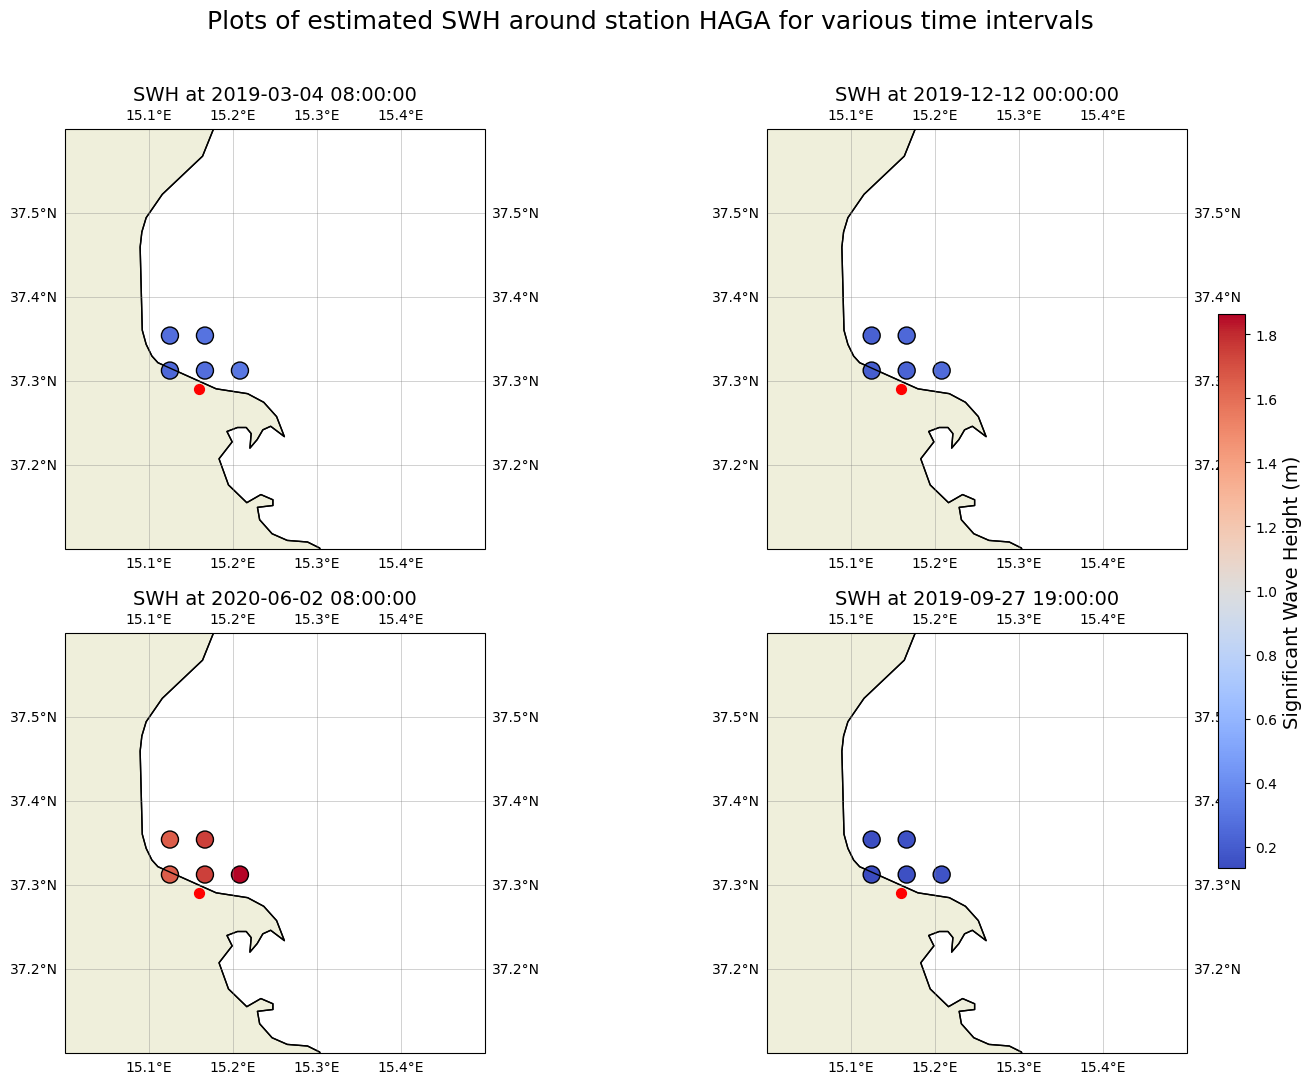

In [47]:
#Plot four timestamps in four subplots
best_Ypred.index = pd.to_datetime(best_Ypred.index)

selected_timestamps = [
    pd.to_datetime("2019-03-04 08:00:00"),
    pd.to_datetime("2019-12-12 00:00:00"),
    pd.to_datetime("2020-06-02 08:00:00"),
    pd.to_datetime("2019-09-27 19:00:00")
]

timestamps_to_plot = best_Ypred.loc[selected_timestamps]

#create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
map_extent = [15.0, 15.5, 37.1, 37.6]

#create the subplots
for timestamp, ax in zip(timestamps_to_plot.index, axes.flat):
    print(timestamp)

    #set map extent
    ax.set_extent(map_extent, crs=ccrs.PlateCarree())

    #add map features
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    #plot seismic stations
    ax.scatter(15.16, 37.29, color='red', marker='o', s=50, label='Seismic Stations')

    #get wave height data for this timestamp
    best_timestamp = best_Ypred.loc[timestamp, :]
    wave_heights = best_timestamp.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords = wave_heights.index.to_list() #get the coordinates of the gridpoints
    lons, lats = zip(*coords)
    heights = wave_heights.values

    #scatter plot of wave heights
    sc = ax.scatter(lats, lons, c=heights, cmap='coolwarm', edgecolor='black', s=150, vmin=timestamps_to_plot.min().min(), vmax=timestamps_to_plot.max().max())

    #add title
    ax.set_title(f"SWH at {timestamp}", fontsize=14)

    #add gridlines
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

#colourbar
cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)
cbar.set_label("Significant Wave Height (m)", fontsize=14)

fig.suptitle(f"Plots of estimated SWH around station {station} for various time intervals",fontsize=18)

#plt.savefig('barcharts/bestMAE/sea_median/bestMAE_median_plot.png', bbox_inches='tight')

#plt.show()

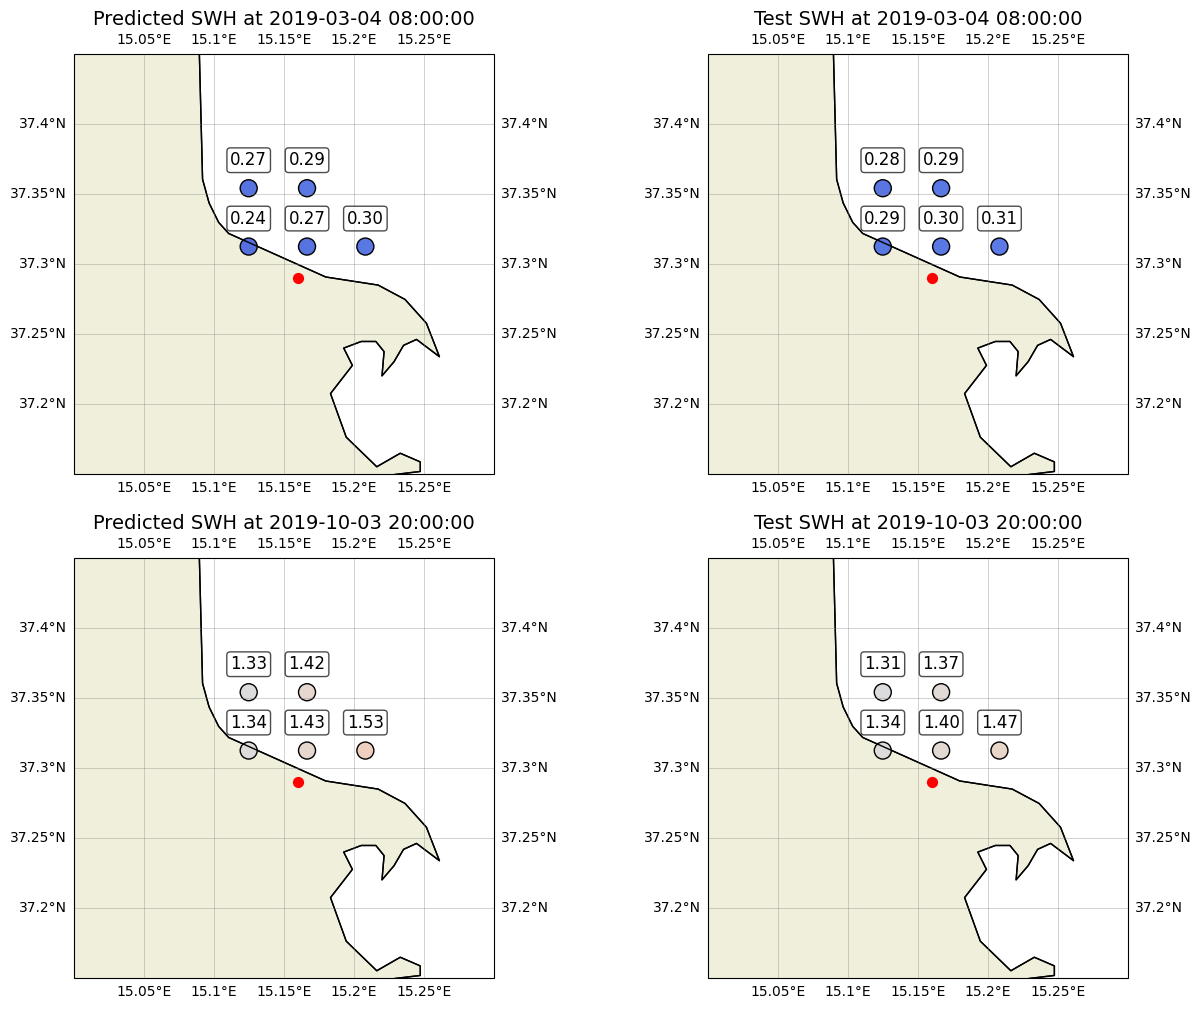

In [64]:
#Plot two timestamps in four subplots - one for pred and one for test for each timestamp
best_Ypred.index = pd.to_datetime(best_Ypred.index)
best_YTest.index = pd.to_datetime(best_YTest.index)

selected_timestamps = [
    pd.to_datetime("2019-03-04 08:00:00"),
    pd.to_datetime("2019-10-03 20:00:00")
]

timestamps_to_plot_pred = best_Ypred.loc[selected_timestamps]
timestamps_to_plot_test = best_YTest.loc[selected_timestamps]

#global min and max to give a consistent colour scale across all the subplots - first five cols contain SWH
vmin = min(best_Ypred.iloc[:, :5].min().min(), best_YTest.iloc[:, :5].min().min())
vmax = max(best_Ypred.iloc[:, :5].max().max(), best_YTest.iloc[:, :5].max().max())

#create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
map_extent = [15.0, 15.3, 37.15, 37.45]

for idx, (timestamp_pred, timestamp_test) in enumerate(zip(timestamps_to_plot_pred.index, timestamps_to_plot_test.index)):
    ax_pred, ax_test = axes[idx, 0], axes[idx, 1]
    
    #set map extent
    ax_pred.set_extent(map_extent, crs=ccrs.PlateCarree())
    ax_test.set_extent(map_extent, crs=ccrs.PlateCarree())
    
    #add map features
    for ax in [ax_pred, ax_test]:
        ax.add_feature(cfeature.LAND, edgecolor='black')
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.scatter(15.16, 37.29, color='red', marker='o', s=50, label='Seismic Stations')
        ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

    #get PREDICTED wave height data for this timestamp
    best_timestamp = best_Ypred.loc[timestamp_pred, :]
    wave_heights_pred = best_timestamp.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_pred = wave_heights_pred.index.to_list() #get the coordinates of the gridpoints
    lons_pred, lats_pred = zip(*coords_pred)
    heights_pred = wave_heights_pred.values
    
    #scatter plot for predicted wave heights
    sc_pred = ax_pred.scatter(lats_pred, lons_pred, c=heights_pred, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_pred.set_title(f"Predicted SWH at {timestamp_pred}", fontsize=14)

    for lat, lon, height in zip(lats_pred, lons_pred, heights_pred):
        ax_pred.text(lat, lon+0.02, f"{height:.2f}", fontsize=12, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

    #get TEST wave height data for this timestamp
    best_timestamp_Test = best_YTest.loc[timestamp_test, :]
    wave_heights_test = best_timestamp_Test.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_test = wave_heights_test.index.to_list() #get the coordinates of the gridpoints
    lons_test, lats_test = zip(*coords_test)
    heights_test = wave_heights_test.values

    #scatter plot for test wave heights
    sc_test = ax_test.scatter(lats_test, lons_test, c=heights_test, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_test.set_title(f"Test SWH at {timestamp_test}", fontsize=14)

    for lat, lon, height in zip(lats_test, lons_test, heights_test):
        ax_test.text(lat, lon+0.02, f"{height:.2f}", fontsize=12, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

#colourbar
#cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)
#cbar.set_label("Significant Wave Height (m)", fontsize=14)

#fig.suptitle(f"Plots of estimated and actual SWH around station {station} for various time intervals",fontsize=18)

#plt.savefig('barcharts/bestMAE/sea_median/bestMAE_median_plot.png', bbox_inches='tight')

#plt.show()

# Time Series

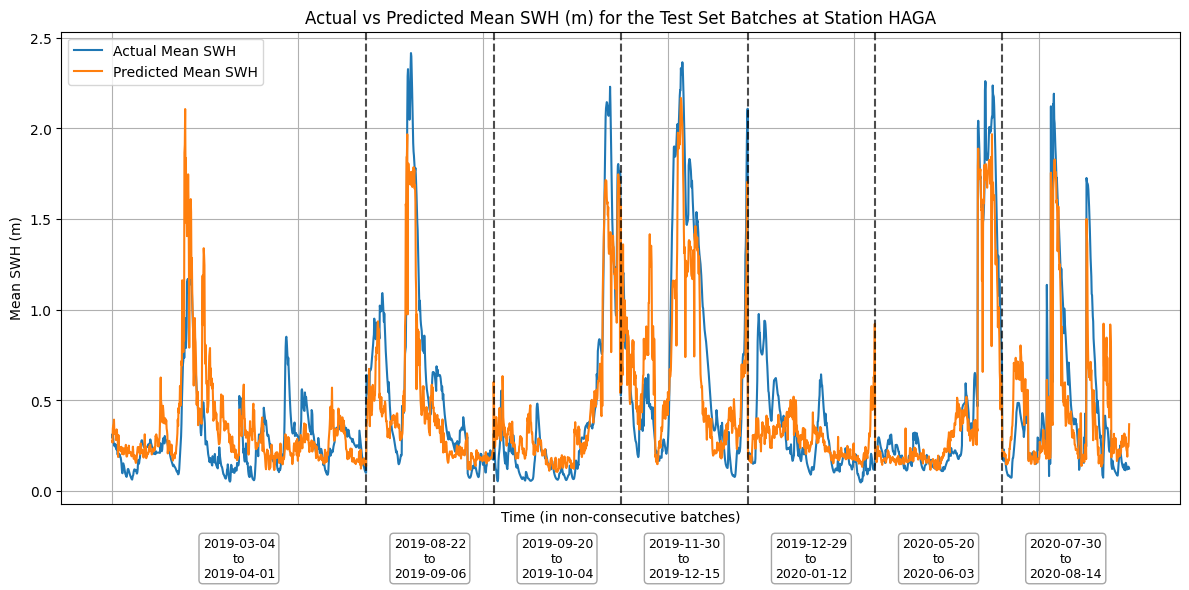

In [65]:
best_YTest.index = pd.to_datetime(best_YTest.index)
best_Ypred.index = pd.to_datetime(best_Ypred.index)

#YTest and Ypred share the same index
sea_mean_df = pd.DataFrame({'Actual': best_YTest.loc[best_Ypred.index, 'sea_mean'],
                            'Predicted': best_Ypred.loc[best_Ypred.index, 'sea_mean']
                           })

#reset the index to plot skipped parts where there is no data
sea_mean_df = sea_mean_df.reset_index()
sea_mean_df.rename(columns={'index': 'Timestamp'}, inplace=True)
sea_mean_df = sea_mean_df.sort_values('Timestamp').reset_index(drop=True)

#find when time gap is greater than 2 hours
time_deltas = sea_mean_df['Timestamp'].diff().dt.total_seconds() / 3600 #convert to hours
vline_spacing = time_deltas[time_deltas >= 2].index.tolist()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sea_mean_df.index, sea_mean_df['Actual'], label='Actual Mean SWH')
ax.plot(sea_mean_df.index, sea_mean_df['Predicted'], label='Predicted Mean SWH')

#plot vertical lines
for x in vline_spacing:
    ax.axvline(x=x, color='black', alpha=0.7, linestyle='--')

#get xlabels
chunk_ends = [vline_spacing[0]-1] + [vline_spacing[j+1]-1 for j in range(len(vline_spacing)-1)] + [len(sea_mean_df)-1]
chunk_starts = [0] + vline_spacing

for start, end in zip(chunk_starts, chunk_ends):
    midpoint = (start + end) // 2
    start_time = sea_mean_df.loc[start, 'Timestamp'].strftime('%Y-%m-%d')
    end_time = sea_mean_df.loc[end, 'Timestamp'].strftime('%Y-%m-%d')
    label = f"{start_time}\nto\n{end_time}"

    ax.text(midpoint, -0.07, label, transform=ax.get_xaxis_transform(),
            ha='center', va='top', fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.7))
    
#switch off default x ticks, major and minor, from the bottom and the top and remove xlabels
plt.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False)

plt.xlabel("Time (in non-consecutive batches)")
plt.ylabel("Mean SWH (m)")
plt.title(f"Actual vs Predicted Mean SWH (m) for the Test Set Batches at Station {station}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()